In [45]:
import pandas as pd

In [46]:
incels_df = pd.read_csv('incels_forum_data.csv', encoding = 'utf-8')

In [47]:
incels_df.head()

,Title,Tags,Date,Views,Replies,Post Content,Link
0,Rules and FAQ,Untagged,"Nov 9, 2017",351000,14,welcome! this is a forum for male involuntary...,https://incels.is/threads/rules-and-faq.799/
1,Introduction to Incels,Untagged,"Jan 18, 2018",75000,0,introduction to incels what does incel mean? ...,https://incels.is/threads/introduction-to-ince...
2,ITS BEGUN! THE FUTURE IS POLYGAMY!!!,News,"Dec 14, 2020",40000,150,view: https://youtu.be/n2zk7ojtcjq even red ...,https://incels.is/threads/its-begun-the-future...
3,ULTIMATE TEENLOVEPILL: PROOF THAT TEEN LOVE IS...,Blackpill,"Oct 18, 2020",41000,175,many people who are bluepilled say that teen l...,https://incels.is/threads/ultimate-teenlovepil...
4,[STUDY] Blind women care about looks as much a...,Blackpill,"Jul 30, 2021",11000,78,nuclear blackpill of doom @master @sergeantinc...,https://incels.is/threads/study-blind-women-ca...


In [48]:
str(incels_df['Post Content'])

"0      welcome!  this is a forum for male involuntary...\n1      introduction to incels  what does incel mean? ...\n2      view: https://youtu.be/n2zk7ojtcjq   even red ...\n3      many people who are bluepilled say that teen l...\n4      nuclear blackpill of doom @master @sergeantinc...\n                             ...                        \n204    https://ifstudies.org/blog/male-sexlessness-is...\n205    https://medium.com/@worstonlinedate...ably-bet...\n206    several studies have shown that immediate attr...\n207    i've said this before and i say it here once a...\n208    scientific proof link to pdf    for men, the r...\nName: Post Content, Length: 209, dtype: object"

In [49]:
import nltk
from nltk import word_tokenize
from nltk.text import Text


nltk.download('punkt')
nltk.download('stopwords')

# Replace missing values with an empty string 
incels_df['Post Content'].fillna('', inplace=True)

# Flatten the list of lists to perform the lower function
tokens = [word_tokenize(str(post).lower()) for post in incels_df['Post Content']]
flat_tokens = [token for sublist in tokens for token in sublist]

# Create Text object for concordance
text = Text(flat_tokens)

# Find concordances for specific words
violence_concordance = text.concordance('violence', width=100, lines=10)
self_harm_concordance = text.concordance('self-harm', width=100, lines=10)
racism_concordance = text.concordance('racism', width=100, lines=10)
misogyny_concordance = text.concordance('misogyny', width=100, lines=10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Displaying 10 of 61 matches:
more likely to be victims of intimate partner violence and unwanted sexual experiences , the perpetr
t come from a logical place . it 's a form of violence . they are basically saying , `` fuck you , t
to expand ... source : the sense in senseless violence : male reproductive strategy and the modern s
. can . not . win . the constant male on male violence we observe on these forums is literally exact
/content/10.1101/171330v2 though the surge in violence affected all the races and both genders , it 
the mid-1980s to 72 per 100,000. the flood of violence from the 1960s through the 1980s reshaped ame
 lustful as one engaged or witnessing acts of violence ” should be another one , based on what i hav
 you doofus . your only advantage as a man is violence but even then , i am not so sure women don ’ 
 alive at this point , they resort to extreme violence in the bedroom or outright disgusting acts li
nows is hybristophilia , female attraction to violence : https

# Tokenizing and Concordance

In [50]:
import nltk
from nltk import word_tokenize
from nltk.text import Text


nltk.download('punkt')
nltk.download('stopwords')

# Replace missing values with an empty string 
incels_df['Post Content'].fillna('', inplace=True)

# Flatten the list of lists to perform the lower function
tokens = [word_tokenize(str(post).lower()) for post in incels_df['Post Content']]
flat_tokens = [token for sublist in tokens for token in sublist]

# Create Text object for concordance
text = Text(flat_tokens)

# Find concordances for specific words
violence_concordance = text.concordance('violence', width=100, lines=10)
self_harm_concordance = text.concordance('self-harm', width=100, lines=10)
racism_concordance = text.concordance('racism', width=100, lines=10)
misogyny_concordance = text.concordance('misogyny', width=100, lines=10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Displaying 10 of 61 matches:
more likely to be victims of intimate partner violence and unwanted sexual experiences , the perpetr
t come from a logical place . it 's a form of violence . they are basically saying , `` fuck you , t
to expand ... source : the sense in senseless violence : male reproductive strategy and the modern s
. can . not . win . the constant male on male violence we observe on these forums is literally exact
/content/10.1101/171330v2 though the surge in violence affected all the races and both genders , it 
the mid-1980s to 72 per 100,000. the flood of violence from the 1960s through the 1980s reshaped ame
 lustful as one engaged or witnessing acts of violence ” should be another one , based on what i hav
 you doofus . your only advantage as a man is violence but even then , i am not so sure women don ’ 
 alive at this point , they resort to extreme violence in the bedroom or outright disgusting acts li
nows is hybristophilia , female attraction to violence : https

# Word Frequency Chart

women     1953
men       1634
https      655
people     631
like       625
sex        565
com        564
click      564
sexual     562
expand     562
just       424
female     421
www        386
man        371
study      366
woman      357
age        350
don        334
social     331
male       329
dtype: int64


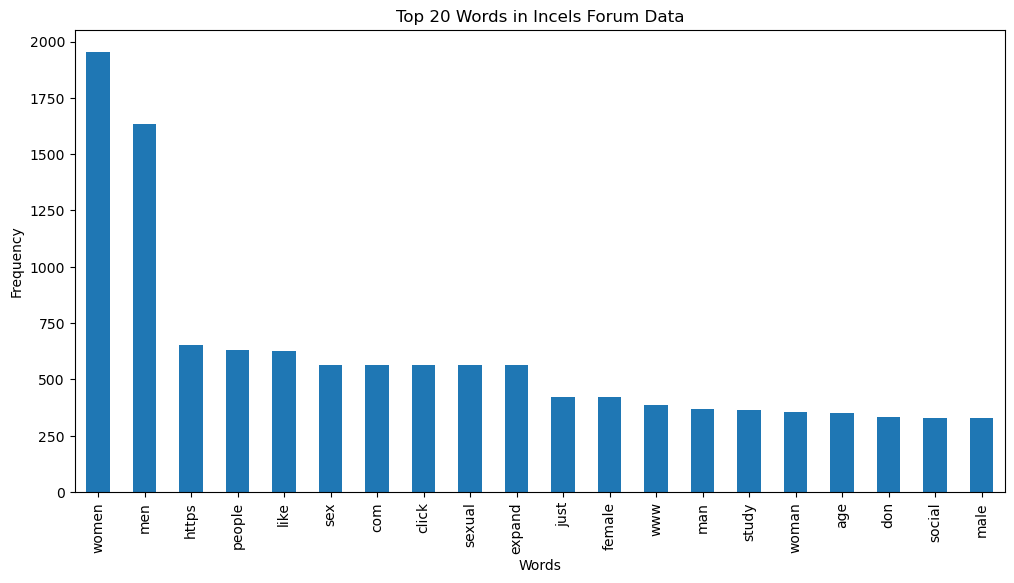

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt



corpus = incels_df['Post Content'].astype(str)

# Tokenization and counting word frequencies
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(corpus)

# Creating a DataFrame with word frequencies
word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Summing up the word frequencies
word_freq_sum = word_freq_df.sum()

# Sorting the words by frequency
sorted_word_freq = word_freq_sum.sort_values(ascending=False)

# Displaying the top N words and their frequencies
top_n_words = 20
print(sorted_word_freq.head(top_n_words))

# Plotting the top N words
plt.figure(figsize=(12, 6))
sorted_word_freq.head(top_n_words).plot(kind='bar')
plt.title('Top {} Words in Incels Forum Data'.format(top_n_words))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Sentiment Analysis

In [52]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each post
incels_df['Sentiment_Score'] = incels_df['Post Content'].apply(lambda x: sia.polarity_scores(x)['compound'])
incels_df.head(10)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Title,Tags,Date,Views,Replies,Post Content,Link,Sentiment_Score
0,Rules and FAQ,Untagged,"Nov 9, 2017",351000,14,welcome! this is a forum for male involuntary...,https://incels.is/threads/rules-and-faq.799/,-0.4509
1,Introduction to Incels,Untagged,"Jan 18, 2018",75000,0,introduction to incels what does incel mean? ...,https://incels.is/threads/introduction-to-ince...,0.9964
2,ITS BEGUN! THE FUTURE IS POLYGAMY!!!,News,"Dec 14, 2020",40000,150,view: https://youtu.be/n2zk7ojtcjq even red ...,https://incels.is/threads/its-begun-the-future...,0.3612
3,ULTIMATE TEENLOVEPILL: PROOF THAT TEEN LOVE IS...,Blackpill,"Oct 18, 2020",41000,175,many people who are bluepilled say that teen l...,https://incels.is/threads/ultimate-teenlovepil...,0.9484
4,[STUDY] Blind women care about looks as much a...,Blackpill,"Jul 30, 2021",11000,78,nuclear blackpill of doom @master @sergeantinc...,https://incels.is/threads/study-blind-women-ca...,0.9900
5,Does longterm inceldom destroy a man's pairbon...,Serious,"Sep 26, 2021",34000,221,"in my case, i'm afraid it has. if an attractiv...",https://incels.is/threads/does-longterm-inceld...,0.9559
6,The Ugly Laws 1867 - 1974: Cruelty Imposed Upo...,Blackpill,"Dec 17, 2023",2000,34,"introduction: the ugly laws, prevalent in the ...",https://incels.is/threads/the-ugly-laws-1867-1...,-0.9987
7,It's so sad that we replace socialization with...,Untagged,"Nov 20, 2020",18000,89,"normal are constantly making memories, and tho...",https://incels.is/threads/its-so-sad-that-we-r...,-0.7872
8,[STUDY] Human touch makes us feel happy and re...,Blackpill,"Jan 2, 2021",17000,99,"""why do you care about sex and relationships??...",https://incels.is/threads/study-human-touch-ma...,0.9986
9,Even asexuals are sexual beings who fuck and j...,JFL,"Mar 8, 2022",18000,117,even asexuals are sexual beings. they're fraud...,https://incels.is/threads/even-asexuals-are-se...,0.9965


In [53]:
#Hi, I copied the codes from Eleni for running. Below are the codes I wrote for the 3rd part. Please run these codes in order

# Active Learning Exercises

In this section, we will focus on two further analysis: visualization of word frequency analysis and an in-depth exploration of sentiment analysis. Through these exercises, our aim is to guide you to explore the nuances in the posts.

1. Visualization of Word Frequency Analysis

The most common words in forum postings will be visually represented using word clouds, highlighting popular subjects or important terms of conversation.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


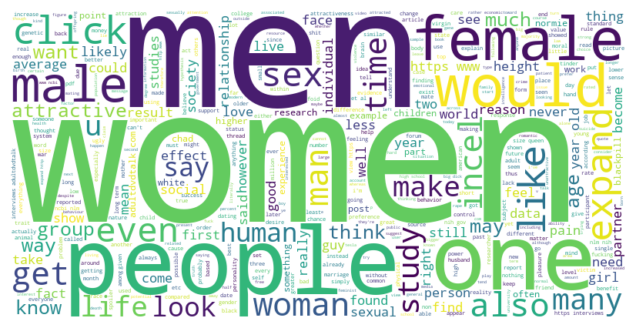

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download the stopwords list if not already done
nltk.download('stopwords')

# Combine all post content into one long string
text = " ".join(post for post in incels_df['Post Content'])

# Define the stopwords
stop_words = set(stopwords.words('english'))

# Create a WordCloud object
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400, max_words=1000).generate(text)

# Display the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In Python, in addition to word clouds and bar charts, there are various methods that can be used for visualizing word frequency data, such as tree and bubble charts. Now, It's your time to create interesting data visualisations! 

In [55]:
# Your code

2.Advanced Sentiment Analysis

After conducting sentiment analysis on forum posts and quantifying the emotional tendencies of each post, we can further explore t the relationship between sentiment scores and other features like post lengths. views and replies.

Correlation between Post Length and Sentiment Score: 0.051302227588354316


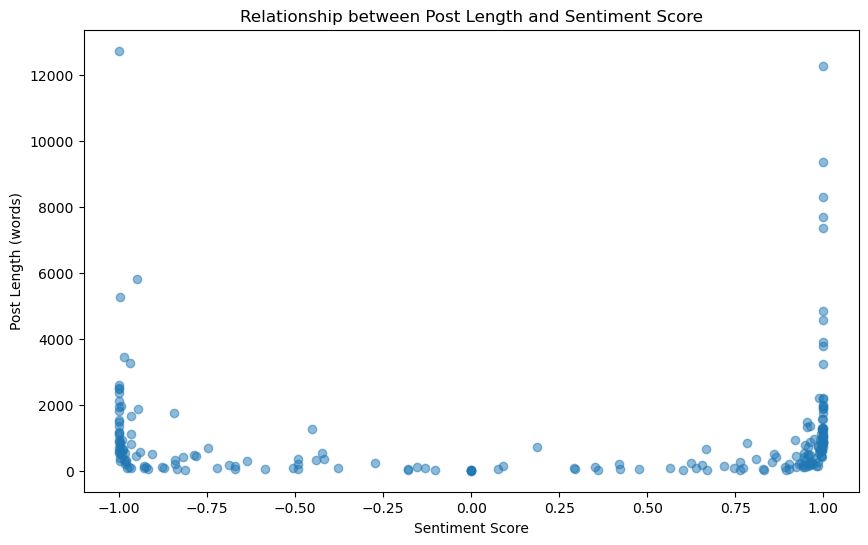

In [56]:
# Calculate the length of each post in words
incels_df['Post_Length'] = incels_df['Post Content'].apply(lambda x: len(x.split()))

# Calculate the correlation between post length and sentiment score
correlation = incels_df['Sentiment_Score'].corr(incels_df['Post_Length'])
print("Correlation between Post Length and Sentiment Score:", correlation)

# Visualize the relationship between the two variables with a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(incels_df['Sentiment_Score'], incels_df['Post_Length'], alpha=0.5)
plt.title('Relationship between Post Length and Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Post Length (words)')
plt.show()

Through the analysis of the collective emotional tone of posts over periods of days, months, or even years, we can learn about how the dynamics of the forum's community are changing over time. 

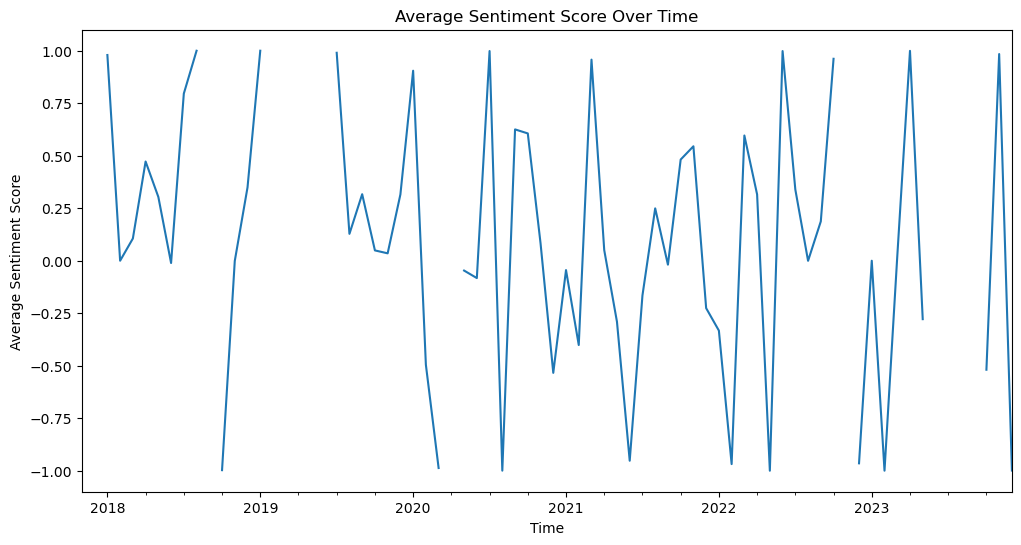

In [57]:
# Convert the 'Date' column to a datetime object
incels_df['Date'] = pd.to_datetime(incels_df['Date'])

# Set the 'Date' column as the DataFrame's index
incels_df.set_index('Date', inplace=True)

# Calculate the average sentiment score for each month/year
# Choose 'M' or 'Y' to aggregate by month or year
average_sentiment_over_time = incels_df['Sentiment_Score'].resample('M').mean()

# Plot a time series chart to show how sentiment scores change over time
plt.figure(figsize=(12, 6))
average_sentiment_over_time.plot()
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Time')
plt.ylabel('Average Sentiment Score')
plt.show()

Futhermore,  you can explore the relationship between sentiment scores and other features. Now, have a try!

In [58]:
# Your code

Congratulations on completing all the exercises! You're so great! 😄